Dataset: Dermatology Data: https://archive.ics.uci.edu/ml/machine-learning-databases/dermatology/dermatology.data

This database contains 34 attributes, 33 of which are linear
valued and one of them is nominal. 

     The differential diagnosis of erythemato-squamous diseases is a real
     problem in dermatology. They all share the clinical features of
     erythema and scaling, with very little differences. The diseases in
     this group are psoriasis, seboreic dermatitis, lichen planus, 
     pityriasis rosea, cronic dermatitis, and pityriasis rubra pilaris.
     Usually a biopsy is necessary for the diagnosis but unfortunately
     these diseases share many histopathological features as
     well. Another difficulty for the differential diagnosis is that a
     disease may show the features of another disease at the beginning
     stage and may have the characteristic features at the following stages. 
     Patients were first evaluated clinically with 12 features.
     Afterwards, skin samples were taken for the evaluation of 22
     histopathological features. The values of the histopathological features
     are determined by an analysis of the samples under a microscope. 

     In the dataset constructed for this domain, the family history feature
     has the value 1 if any of these diseases has been observed in the
     family, and 0 otherwise. The age feature simply represents the age of
     the patient. Every other feature (clinical and histopathological) was
     given a degree in the range of 0 to 3. Here, 0 indicates that the
     feature was not present, 3 indicates the largest amount possible,
     and 1, 2 indicate the relative intermediate values.


In [93]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")

In [94]:
df=pd.read_csv("dermatology.data",index_col=False)


In [95]:
df.head(1)


,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2


Q1. A Boxplot Analysis of all the attributes of the dataset.

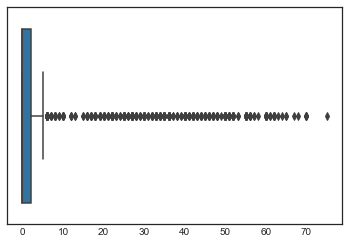

In [96]:
def into(X):
    if X=='?':
        return 0
    else:
        return int(X)
boxdf=df.applymap(into)
axis=sns.boxplot(boxdf)
plt.show()

Categorization:
Age -> Below 18 : Children
       Above 18 : Adult
            '?' : Unknown

Class Attribute specifying type of dermatitis:
       Class code:   Class:                  Number of instances:
       1             psoriasis			    112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris        20
      
Every other feature (clinical and histopathological) was
given a degree in the range of 0 to 3. Here, 0 indicates that the
feature was not present, 3 indicates the largest amount possible,
and 1, 2 indicate the relative intermediate values.

In [97]:
for i in df.columns:
    if i=='age':
        def change_age(s):
            if s==np.NaN or s=='?':
                return 'Unknown'
            
            s=int(s)
            if s<18:
                return 'Child'
            elif s>=18:
                return 'Adult'
        df[i]=df[i].apply(change_age)
    elif i=='class':
        def assign(a):
            if a==1:
                return 'psoriasis'
            elif a==2:
                return 'seboreic dermatitis'
            elif a==3:
                return 'lichen planus'
            elif a==4:
                return 'pityriasis rosea'
            elif a==5:
                return 'cronic dermatitis'
            elif a==6:
                return 'pityriasis rubra pilaris'
        df[i]=df[i].apply(assign)
    else:
        def category(a):
            if a=='0' or a==0.0:
                return 'Absent'
            elif a=='1' or a==1.0:
                return 'Less'
            elif a=='2' or a==2.0:
                return 'Significant'
            elif a=='3' or a==3.0:
                return 'Extreme'
            else:
                return 'Unknown'
        df[i]=df[i].apply(category)    
df.head(5)       

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,...,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,age,class
0,Significant,Significant,Absent,Extreme,Absent,Absent,Absent,Absent,Less,Absent,...,Absent,Absent,Extreme,Absent,Absent,Absent,Less,Absent,Adult,seboreic dermatitis
1,Extreme,Extreme,Extreme,Significant,Less,Absent,Absent,Absent,Less,Less,...,Absent,Absent,Absent,Absent,Absent,Absent,Less,Absent,Child,psoriasis
2,Significant,Less,Significant,Extreme,Less,Extreme,Absent,Extreme,Absent,Absent,...,Absent,Significant,Extreme,Significant,Absent,Absent,Significant,Extreme,Adult,lichen planus
3,Significant,Significant,Significant,Absent,Absent,Absent,Absent,Absent,Extreme,Significant,...,Extreme,Absent,Absent,Absent,Absent,Absent,Extreme,Absent,Adult,psoriasis
4,Significant,Extreme,Significant,Significant,Significant,Significant,Absent,Significant,Absent,Absent,...,Significant,Extreme,Significant,Extreme,Absent,Absent,Significant,Extreme,Adult,lichen planus


In [98]:
def rename(x):
    if x=='Less':
        return 'Yes'
    else:
        return 'No'
df['family history']=df['family history'].apply(rename)
    

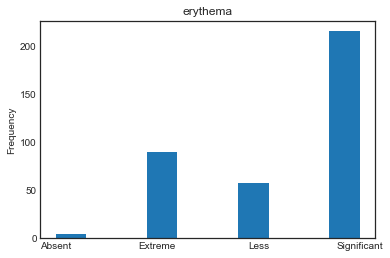

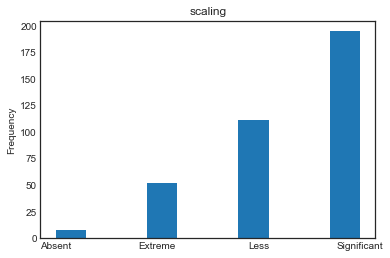

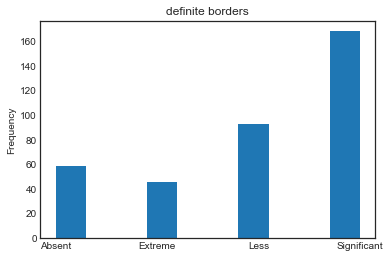

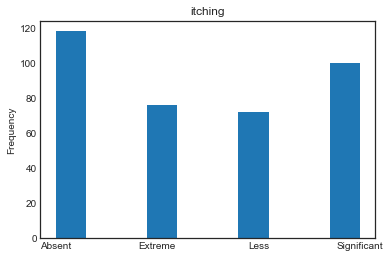

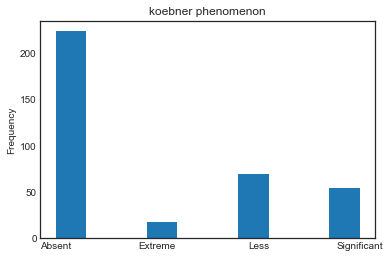

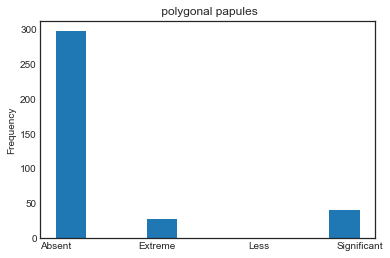

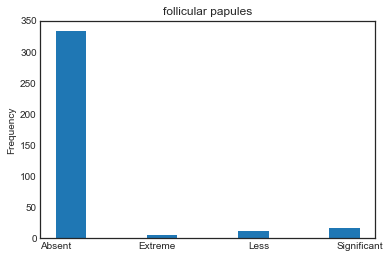

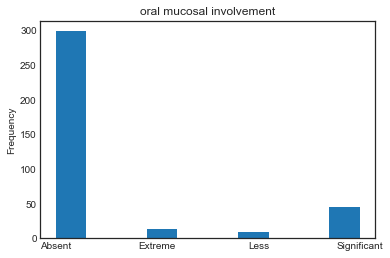

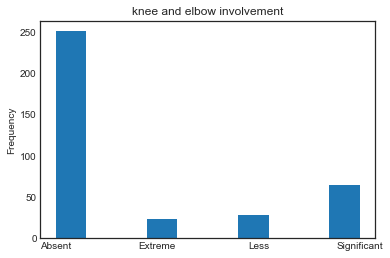

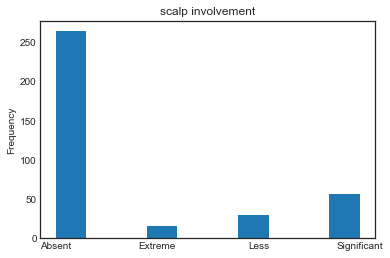

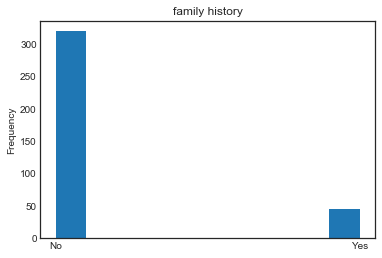

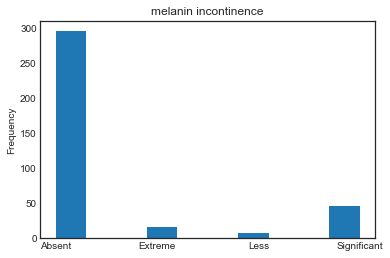

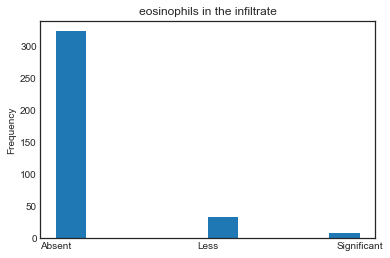

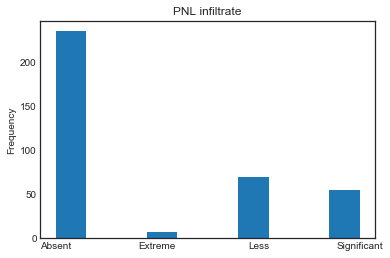

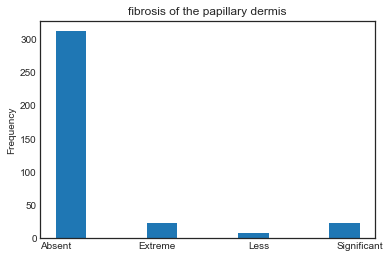

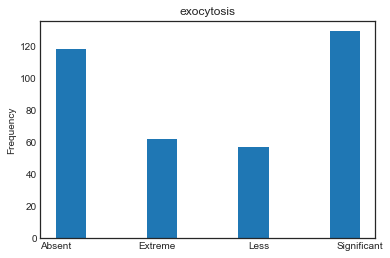

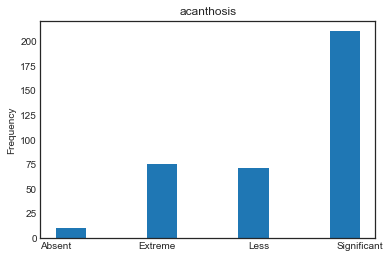

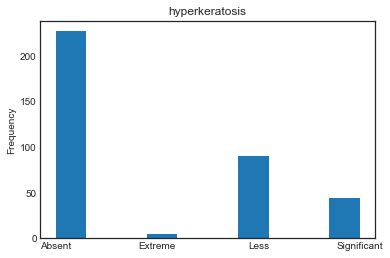

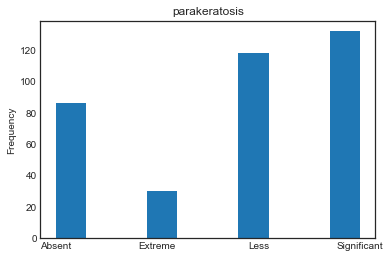

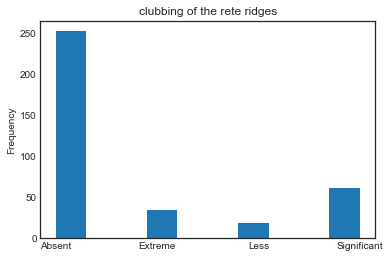

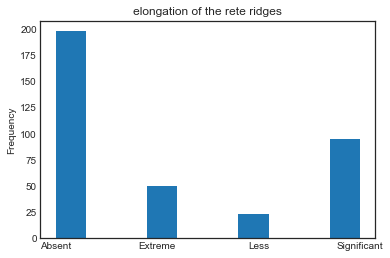

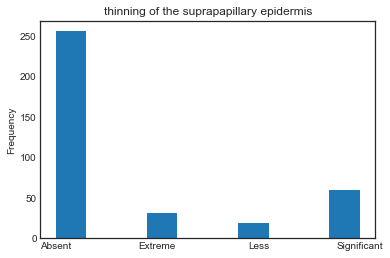

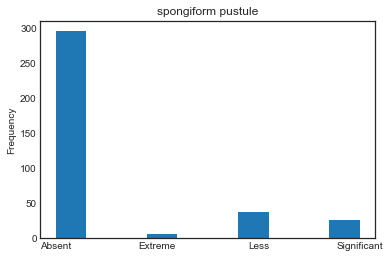

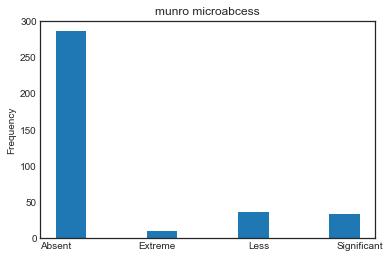

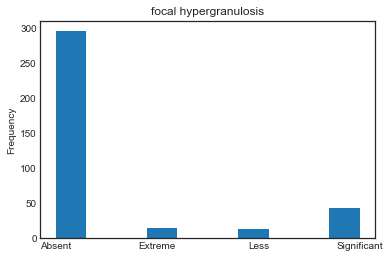

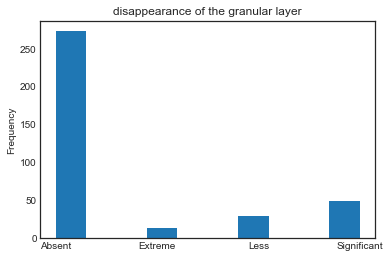

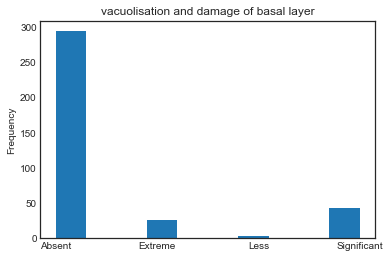

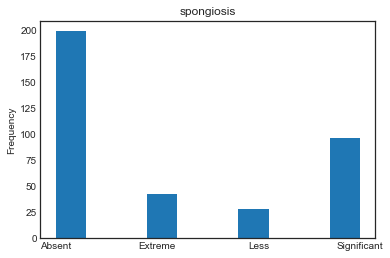

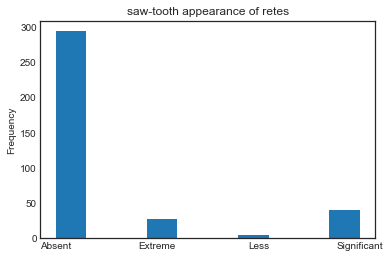

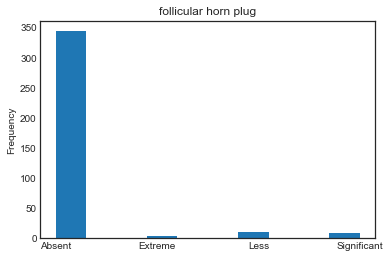

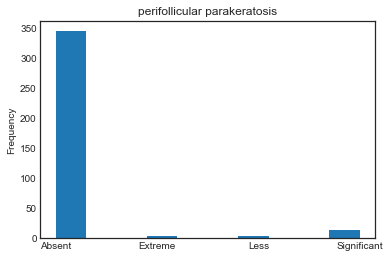

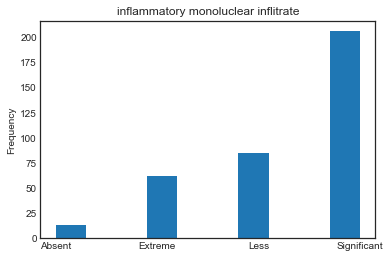

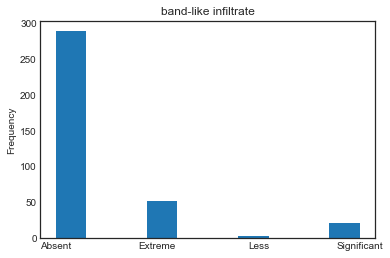

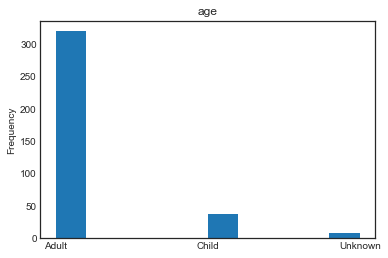

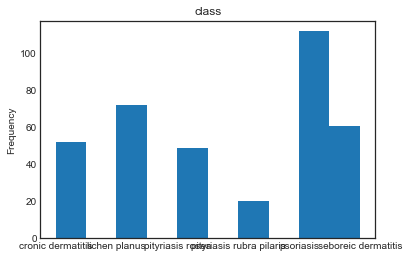

In [99]:
for i in df.columns:
    a=str(i)
    plt.hist(df[a])
    plt.ylabel("Frequency")
    #plt.xlabel("Class")
    plt.title(a)
    plt.show()
    print('\n\n')

In [100]:
df2=df.drop(['age','family history'],axis=1)

 psoriasis			    112
       2             seboreic dermatitis             61
       3             lichen planus                   72
       4             pityriasis rosea                49
       5             cronic dermatitis               52    
       6             pityriasis rubra pilaris     

We divide the dataset into six different datasets on the basis of class of dermatitis so as to perform a multi dimensional analysis of the symptoms with the type of dermatitis.

In [101]:
different=[]
different.append(df2[df2['class']=='psoriasis'])
different.append(df2[df2['class']=='seboreic dermatitis'])
different.append(df2[df2['class']=='lichen planus'])
different.append(df2[df2['class']=='pityriasis rosea'])
different.append(df2[df2['class']=='cronic dermatitis'])
different.append(df2[df2['class']=='pityriasis rubra pilaris'])
for i in different:
    i=i.drop(['class'],axis=1)

In [102]:
listy=[]
def find(df,category):
    for i in df2.columns:
        if i=='class':
            continue           
            
        a=0
        l=0
        s=0
        e=0
        ty= df[i].values
        my_list=[]
        for m in ty:
            my_list.append(m)

        a=my_list.count('Absent')
        l=my_list.count('Less')
        s=my_list.count('Significant')
        e=my_list.count('Extreme')
        t=a+l+s+e

        listy.append({'index':i,'Absent':a,'Less':l,'Significant':s,'Extreme':e,'Total':t,'class':category})
find(different[0],'psoriasis') 
find(different[1],'seboreic dermatitis')
find(different[2],'lichen planus')
find(different[3],'pityriasis rosea')
find(different[4],'cronic dermatitis')
find(different[5],'pityriasis rubra pilaris')
#listy.append({'index':'Total','Absent':ma,'Less':ml,'Significant':ms,'Extreme':me,'Total':mt})    

    

In [103]:
p=[]
for i in listy:
    if (i['Absent']>=i['Total']/2):
        conf=df[df[i['index']]=='Absent']['erythema'].count()
        p.append({'symptom':i['index'],'degree':'Absent','frequency':i['Absent'],'class':i['class'],'Total':i['Total'],'symptoms_frequency':conf})
    if (i['Less']>=i['Total']/2):
        conf=df[df[i['index']]=='Less']['erythema'].count()
        p.append({'symptom':i['index'],'degree':'Less','frequency':i['Less'],'class':i['class'],'Total':i['Total'],'symptoms_frequency':conf})
        
    if (i['Significant']>=i['Total']/2):
        conf=df[df[i['index']]=='Significant']['erythema'].count()
        p.append({'symptom':i['index'],'degree':'Significant','frequency':i['Significant'],'class':i['class'],'Total':i['Total'],'symptoms_frequency':conf})
    if (i['Extreme']>=i['Total']/2):
        conf=df[df[i['index']]=='Extreme']['erythema'].count()
        p.append({'symptom':i['index'],'degree':'Extreme','frequency':i['Extreme'],'class':i['class'],'Total':i['Total'],'symptoms_frequency':conf})
df5=pd.DataFrame(p)      
df5.head()

,Total,class,degree,frequency,symptom,symptoms_frequency
0,112,psoriasis,Significant,63,erythema,215
1,112,psoriasis,Significant,64,scaling,195
2,112,psoriasis,Significant,73,definite borders,168
3,112,psoriasis,Absent,63,koebner phenomenon,224
4,112,psoriasis,Absent,112,polygonal papules,297


In [104]:
df5['support']=df5['frequency']/df5['Total']
df5['confidence']=df5['frequency']/df5['symptoms_frequency']
df5=df5.sort_values(by='support',ascending=False)
df5=df5[df5['confidence']>0.5]
df5=df5.sort_values(by=['support','confidence'],ascending=False)
df5=df5.head(10)
df5=df5.reset_index(drop = True, inplace = False)
df5

,Total,class,degree,frequency,symptom,symptoms_frequency,support,confidence
0,112,psoriasis,Absent,112,spongiosis,199,1.000000,0.562814
1,112,psoriasis,Absent,93,exocytosis,118,0.830357,0.788136
2,72,lichen planus,Extreme,52,band-like infiltrate,52,0.722222,1.000000
3,20,pityriasis rubra pilaris,Significant,13,perifollicular parakeratosis,13,0.650000,1.000000
4,72,lichen planus,Significant,46,melanin incontinence,46,0.638889,1.000000
5,72,lichen planus,Significant,45,oral mucosal involvement,45,0.625000,1.000000
6,112,psoriasis,Significant,69,parakeratosis,132,0.616071,0.522727
7,20,pityriasis rubra pilaris,Significant,12,follicular papules,16,0.600000,0.750000
8,72,lichen planus,Significant,43,vacuolisation and damage of basal layer,43,0.597222,1.000000
9,72,lichen planus,Significant,43,focal hypergranulosis,43,0.597222,1.000000


In [105]:
print("ASSOCIATIONS FOUND")
for i in range(10):
    print('\n',i+1,') Dermatitis Class:',df5.at[i,'class'], ' ',df5.at[i,'symptom'], ' :',df5.at[i,'degree'], ' \n     With a Support% = ',round(df5.at[i,'support']*100,2),'%     Confidence% =',round(df5.at[i,'confidence']*100,2),'%')

ASSOCIATIONS FOUND

 1 ) Dermatitis Class: psoriasis   spongiosis  : Absent  
     With a Support% =  100.0 %     Confidence% = 56.28 %

 2 ) Dermatitis Class: psoriasis   exocytosis  : Absent  
     With a Support% =  83.04 %     Confidence% = 78.81 %

 3 ) Dermatitis Class: lichen planus   band-like infiltrate  : Extreme  
     With a Support% =  72.22 %     Confidence% = 100.0 %

 4 ) Dermatitis Class: pityriasis rubra pilaris   perifollicular parakeratosis  : Significant  
     With a Support% =  65.0 %     Confidence% = 100.0 %

 5 ) Dermatitis Class: lichen planus   melanin incontinence  : Significant  
     With a Support% =  63.89 %     Confidence% = 100.0 %

 6 ) Dermatitis Class: lichen planus   oral mucosal involvement  : Significant  
     With a Support% =  62.5 %     Confidence% = 100.0 %

 7 ) Dermatitis Class: psoriasis   parakeratosis  : Significant  
     With a Support% =  61.61 %     Confidence% = 52.27 %

 8 ) Dermatitis Class: pityriasis rubra pilaris   follicular

In [106]:
df=pd.read_csv("dermatology.data",index_col=False)
def conv(X):
    if X=="?":
        return 1
    return float(X)
df=df.applymap(conv)
X=(df.iloc[::,0:35])
Y=df.iloc[:,34]


In [107]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sb
result=[]
xx=[]
for i in range(99):
    a=(i+1)/100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-a)
    #print(X_train.shape)
    #print(X_test.shape)
    dtc  = DecisionTreeClassifier(max_depth=4)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    #print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))
    result.append([metrics.accuracy_score(y_test, y_pred)])
    xx.append(a)
   # print(result)


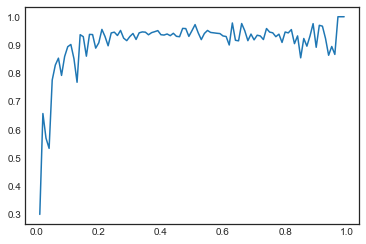

In [108]:
plt.show()
plt.plot(xx,result)
plt.show()

The graph validates the theory that the accuracy increase upon increase in the training set examples and finally approaches 1.